In [150]:
#Obaid Ur Rehman

Analysis on Crime Data of United States 1994-2013.
Dataset can be copied from: https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/1tabledatadecoverviewpdf/table_1_crime_in_the_united_states_by_volume_and_rate_per_100000_inhabitants_1994-2013.xls

In [151]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.plotly as py
import seaborn as sns

In [152]:
cd =pd.read_clipboard()
cd.head()

,Year,Population1,Violent crime,Violent crime rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape (legacy definition)2,Rape (legacy definition)2 rate,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny- theft,Larceny- theft rate,Motor vehicle theft,Motor vehicle theft rate
0,1994,"260,327,021","1,857,670",713.6,"23,326",9.0,"102,216",39.3,"618,949",237.8,"1,113,179",427.6,"12,131,873","4,660.2","2,712,774","1,042.1","7,879,812","3,026.9","1,539,287",591.3
1,1995,"262,803,276","1,798,792",684.5,"21,606",8.2,"97,470",37.1,"580,509",220.9,"1,099,207",418.3,"12,063,935","4,590.5","2,593,784",987.0,"7,997,710","3,043.2","1,472,441",560.3
2,1996,"265,228,572","1,688,540",636.6,"19,645",7.4,"96,252",36.3,"535,594",201.9,"1,037,049",391.0,"11,805,323","4,451.0","2,506,400",945.0,"7,904,685","2,980.3","1,394,238",525.7
3,1997,"267,783,607","1,636,096",611.0,"18,208",6.8,"96,153",35.9,"498,534",186.2,"1,023,201",382.1,"11,558,475","4,316.3","2,460,526",918.8,"7,743,760","2,891.8","1,354,189",505.7
4,1998,"270,248,003","1,533,887",567.6,"16,974",6.3,"93,144",34.5,"447,186",165.5,"976,583",361.4,"10,951,827","4,052.5","2,332,735",863.2,"7,376,311","2,729.5","1,242,781",459.9


In [153]:
cd.columns=['Year','Population','ViolentCrime','ViolentCrimeRate','Murder','MurderRate','Rape','RapeRate','Robbery','RobberyRate','AggravatedAssault','AggravatedAssaultRate','PropertyCrime','PropertyCrimeRate','Burglary','BurglaryRate','LarcenyTheft','LarcenyTheftRate','MotorVehicleTheft','MotorVehicleTheftRate']
cd = cd.replace(",","",regex=True)
cd['Year'] = cd['Year'].astype(str)
cd['Year'] = cd['Year'].str.slice(0,4)
cd = cd.apply(pd.to_numeric)
cd.head()

,Year,Population,ViolentCrime,ViolentCrimeRate,Murder,MurderRate,Rape,RapeRate,Robbery,RobberyRate,AggravatedAssault,AggravatedAssaultRate,PropertyCrime,PropertyCrimeRate,Burglary,BurglaryRate,LarcenyTheft,LarcenyTheftRate,MotorVehicleTheft,MotorVehicleTheftRate
0,1994,260327021,1857670,713.6,23326,9.0,102216,39.3,618949,237.8,1113179,427.6,12131873,4660.2,2712774,1042.1,7879812,3026.9,1539287,591.3
1,1995,262803276,1798792,684.5,21606,8.2,97470,37.1,580509,220.9,1099207,418.3,12063935,4590.5,2593784,987.0,7997710,3043.2,1472441,560.3
2,1996,265228572,1688540,636.6,19645,7.4,96252,36.3,535594,201.9,1037049,391.0,11805323,4451.0,2506400,945.0,7904685,2980.3,1394238,525.7
3,1997,267783607,1636096,611.0,18208,6.8,96153,35.9,498534,186.2,1023201,382.1,11558475,4316.3,2460526,918.8,7743760,2891.8,1354189,505.7
4,1998,270248003,1533887,567.6,16974,6.3,93144,34.5,447186,165.5,976583,361.4,10951827,4052.5,2332735,863.2,7376311,2729.5,1242781,459.9


# Q1. Which year had which crime in abundance?

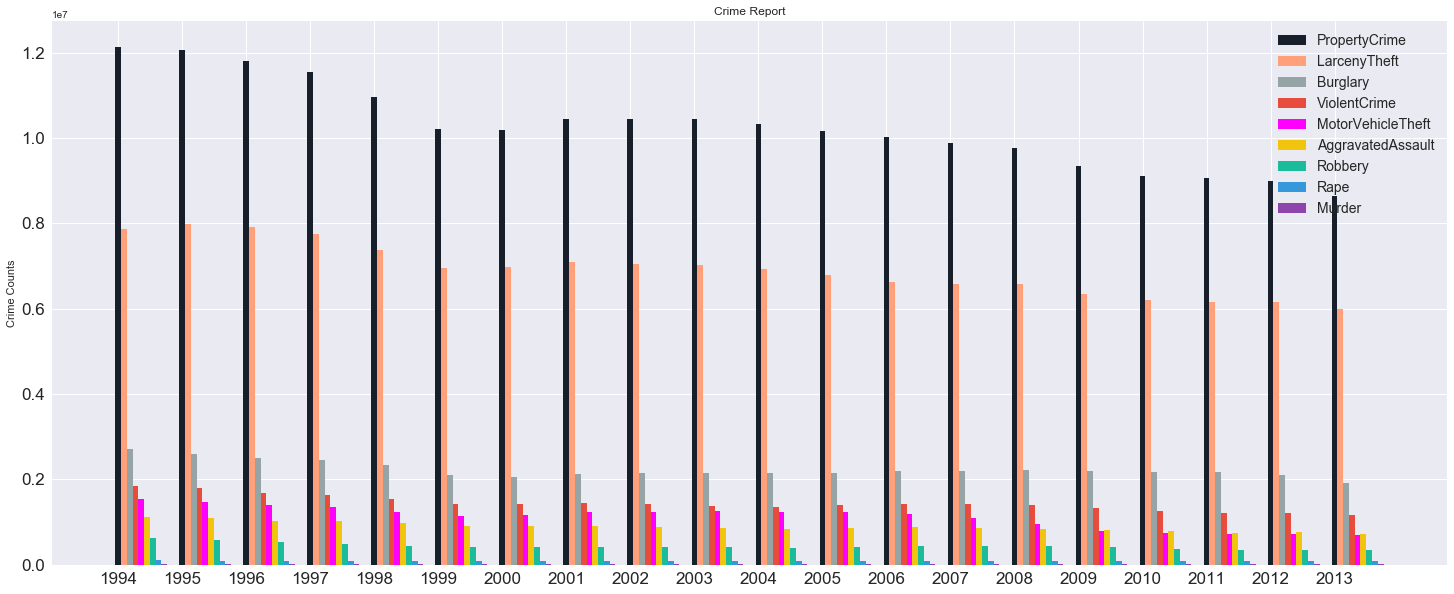

In [178]:
yearAbd = cd[['Year','ViolentCrime','Murder','Rape','Robbery','AggravatedAssault','PropertyCrime','Burglary','LarcenyTheft','MotorVehicleTheft']].copy()
N = len(yearAbd['Year']) #number eqaul to occurance
ind = np.arange(N)  # the positions for groups
width = 0.09       # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))

pplot = ax.bar(ind,yearAbd['PropertyCrime'],width,color='#17202A')
lplot = ax.bar(ind+width*1,yearAbd['LarcenyTheft'],width,color='#FFA07A')
bplot = ax.bar(ind+width*2,yearAbd['Burglary'],width,color='#95A5A6')
vcplot = ax.bar(ind+width*3, yearAbd['ViolentCrime'], width, color='#E74C3C')
mplot = ax.bar(ind+width*4,yearAbd['MotorVehicleTheft'],width,color='#FF00FF')
aplot = ax.bar(ind+width*5,yearAbd['AggravatedAssault'],width,color='#F1C40F')
robplot = ax.bar(ind+width*6,yearAbd['Robbery'],width,color='#1ABC9C')
rplot = ax.bar(ind+width*7,yearAbd['Rape'],width,color='#3498DB')
mplot = ax.bar(ind + width*8,  yearAbd['Murder'], width, color='#8E44AD')
# add some text for labels, title and axes ticks
ax.set_ylabel('Crime Counts')
plt.yticks(fontsize=17)  
plt.xticks(fontsize=17)  
ax.set_title('Crime Report')
ax.set_xticks(ind + width/3000 )
ax.set_xticklabels(yearAbd['Year'])

ax.legend( ('PropertyCrime', 'LarcenyTheft','Burglary','ViolentCrime','MotorVehicleTheft','AggravatedAssault','Robbery','Rape','Murder'),fontsize=14)
plt.show()

# Q2. Whats is the trend of crimes ?

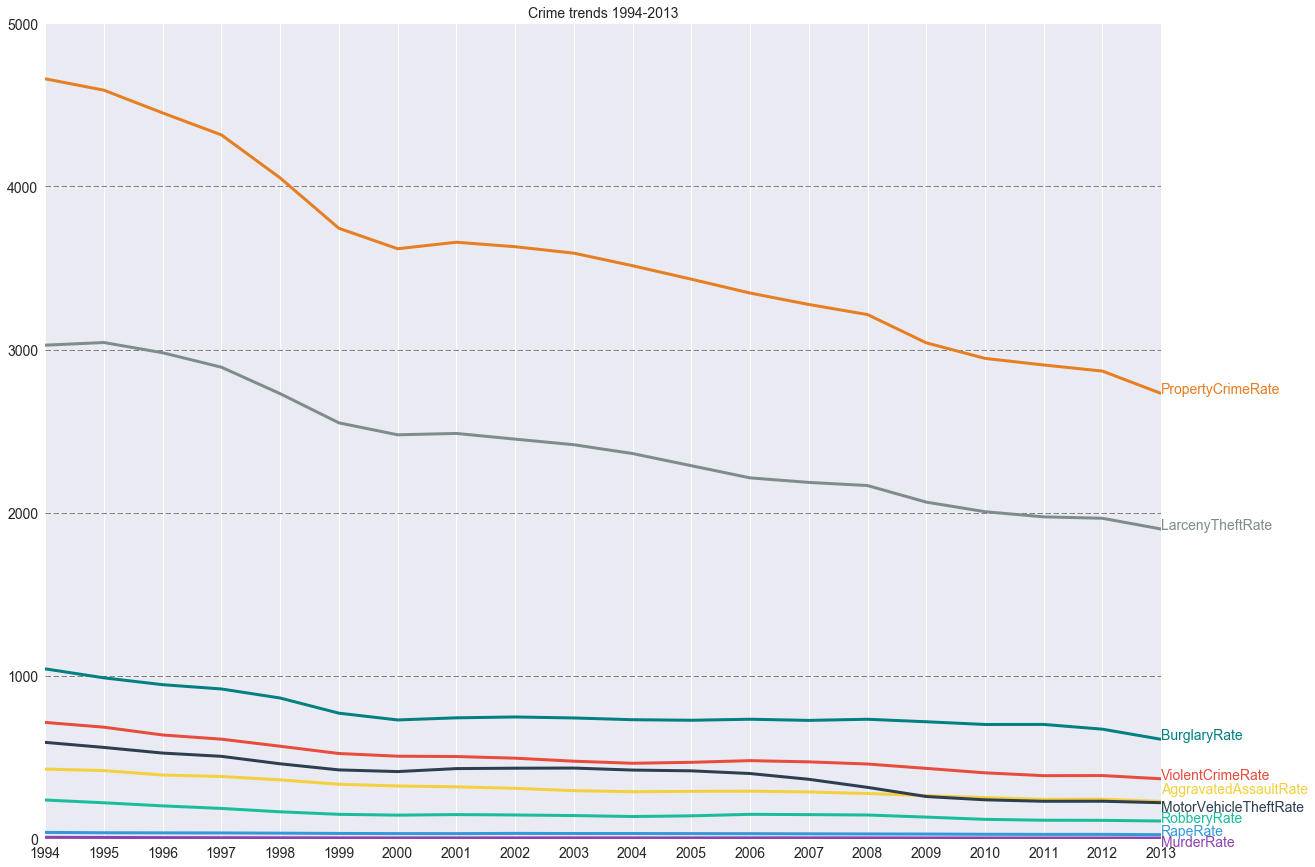

In [155]:
yearRate = cd[['Year','ViolentCrimeRate','MurderRate','RapeRate','RobberyRate','AggravatedAssaultRate','PropertyCrimeRate','BurglaryRate','LarcenyTheftRate','MotorVehicleTheftRate']]
    
colors = ['#E74C3C','#8E44AD','#3498DB','#1ABC9C','#F4D03F','#E67E22','#008080','#7F8C8D','#2C3E50']
plt.figure(figsize=(20,15))
ax = plt.subplot(111)
ax.set_title("Crime trends 1994-2013",fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(0,5000)
plt.xlim(1994, 2013)
    
plt.yticks(fontsize=14)  
plt.xticks(fontsize=14)  

for y in range(0, 5000, 1000):    
    plt.plot(range(1994, 2014), [y] * len(range(1994, 2014)), "--", lw=0.5, color="black", alpha=5)

rates=['ViolentCrimeRate','MurderRate','RapeRate','RobberyRate','AggravatedAssaultRate','PropertyCrimeRate','BurglaryRate','LarcenyTheftRate','MotorVehicleTheftRate']

for rank, column in enumerate(rates):
    plt.plot(yearRate.Year.values,yearRate[column],lw=3, color=colors[rank])  
    plt.xticks(cd['Year'])
    y_pos = yearRate[column].values[-1] - 0.5    
    if column == "MotorVehicleTheftRate":    
        y_pos -= 50 
    elif column == "MurderRate":    
        y_pos -= 50 
    elif column == "AggravatedAssaultRate":    
        y_pos += 50     
    elif column == "RobberyRate":    
        y_pos -= 9
    plt.text(2013, y_pos, column, fontsize=14, color=colors[rank]) 

# Q3. Is there any relation between Murder and property crimes?

Correlation between Murder and Property crime: 0.889049606944


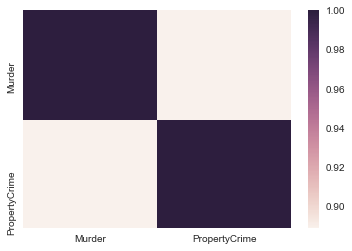

In [156]:
murderPropert = yearAbd[['Murder','PropertyCrime']].copy()
corr = murderPropert.corr()
print "Correlation between Murder and Property crime: " +str(murderPropert['Murder'].corr(murderPropert['PropertyCrime']))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

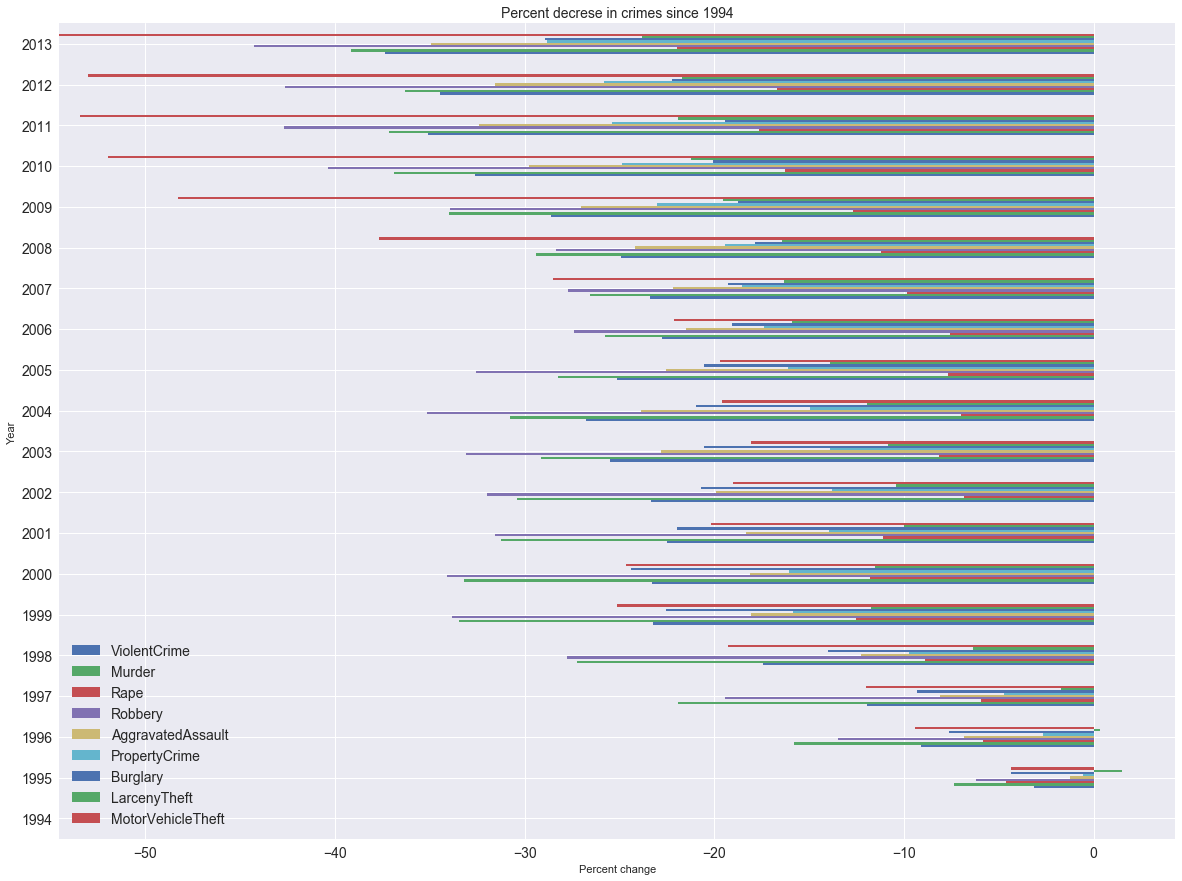

In [169]:
def percent(dataframe,d1):
    '''calculate percent change relative to first column (1994)'''
    a = 100*((dataframe.ix[0,:]-d1)/dataframe.ix[0,:])
    return 0-a
 
#pass the entire data frame to this function
yearAbd = cd[['ViolentCrime','Murder','Rape','Robbery','AggravatedAssault','PropertyCrime','Burglary','LarcenyTheft','MotorVehicleTheft']].copy()
percent_data = percent(yearAbd,yearAbd.ix[0:,:])

percent_data.index=percent_data.index.astype(int)
ax = percent_data.plot(kind='barh',figsize=(20,15))
ax.yaxis.set_ticklabels(cd['Year'])

plt.title('Percent decrese in crimes since 1994',fontsize=14)
plt.xlabel('Percent change')
plt.ylabel('Year')
plt.yticks(fontsize=14)  
plt.xticks(fontsize=14)

ax.legend( ('ViolentCrime','Murder','Rape','Robbery','AggravatedAssault','PropertyCrime','Burglary','LarcenyTheft','MotorVehicleTheft'),fontsize=14)


# Q5. What is the trent of population during this timeframe? 

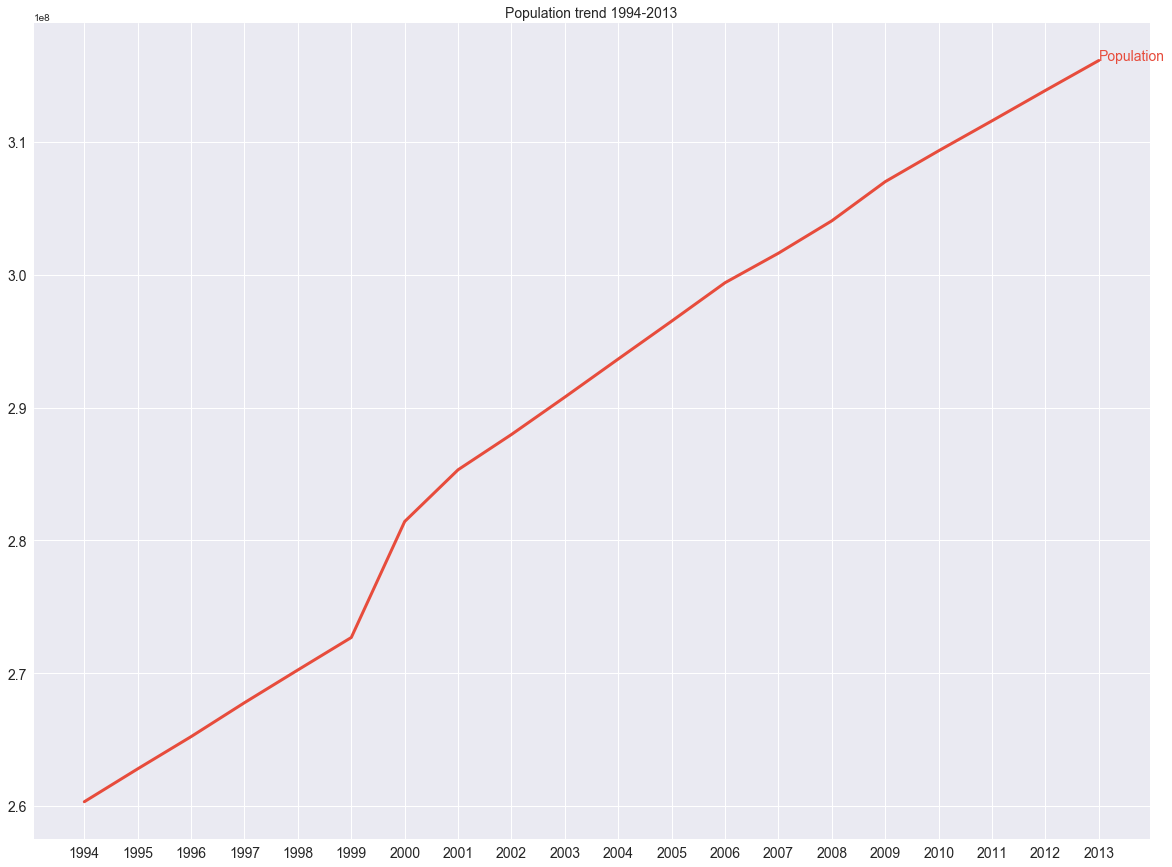

In [158]:
poprate = cd[['Year','Population']]   
plt.figure(figsize=(20,15))
ax = plt.subplot(111)
ax.set_title("Population trend 1994-2013",fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks(fontsize=14)  
plt.xticks(fontsize=14)  

rates=['Population']
for rank, column in enumerate(rates):
    plt.plot(poprate.Year.values,poprate[column],lw=3, color='#E74C3C')  
    plt.xticks(cd['Year'])
    y_pos = poprate[column].values[-1] - 0.5    
    plt.text(2013, y_pos, column, fontsize=14, color='#E74C3C')